In [3]:
import pandas as pd

In [9]:
pd.Series(range(1,10))

0    1
1    2
2    3
3    4
4    5
5    6
6    7
7    8
8    9
dtype: int64

In [23]:
pd.DataFrame([["p1","u1"]], columns=['product','userid'])

,product,userid
0,p1,u1


In [29]:
df = pd.DataFrame({ "苹并":[88, 99, 92], "香蕉":[70, 90, 95],}, index=["1进","2进", "3进"])
df

,苹并,香蕉
1进,88,70
2进,99,90
3进,92,95


In [35]:
df[df["香蕉"]>90]

,苹并,香蕉
3进,92,95


In [41]:
df.sum()

苹并    279
香蕉    255
dtype: int64

In [6]:
import pandas as pd

In [8]:
a1 = pd.DataFrame({'a':[1,2],'b':[3,4]})
a2 = pd.DataFrame({'a':[5,6],'b':[7,7]})

In [10]:
df1 = pd.DataFrame({ "苹宋":[88, 99, 92], "香蕉":[70, 90, 95],}, index=["1染","2染", "3染"] )
df2 = pd.DataFrame({ "眼竹":[88, 99, 92], "杆瓜":[70, 90, 95],}, index=["1染","2染", "3染"] ) 

In [14]:
df1

,苹宋,香蕉
1染,88,70
2染,99,90
3染,92,95


In [19]:
import numpy as np

In [37]:
df = pd.DataFrame(np.random.randint(0,100, size=10))

In [59]:
pd.cut(df[0],bins=[60,80,100],right=False).value_counts()

0
[60, 80)     1
[80, 100)    1
Name: count, dtype: int64

In [213]:
data = pd.read_excel('Coral和Niki的记账.xlsx')
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']  # 指定支持中文的字体
plt.rcParams['axes.unicode_minus'] = False    # 解决负号显示问题

In [ ]:
result

In [77]:
data.sort_values(by=['金额'])

,姓名,类别,金额,备注,日期
28,Coral,交通,1.5,NaN,2025-04-30
23,Coral,交通,2.4,NaN,2025-04-30
5,Coral,交通,2.4,NaN,2025-04-28
31,Coral,交通,2.4,NaN,2025-04-30
20,Coral,交通,2.4,NaN,2025-04-29
...,...,...,...,...,...
2,Niki,学习,9500.0,2个月健身卡,2025-02-01
63,Niki,住,10600.0,2个月房租,2025-01-01
4,Niki,娱乐,11000.0,迪拜,2025-02-01
21,Coral,学习,12900.0,学习ai课,2025-03-29


### 数据分析

In [12]:
import pandas as pd

In [14]:
# 导入阿里14年用户行为数据
pdata = pd.read_csv("user_action.csv")

In [15]:
pdata['ts'] = pd.to_datetime(pdata['time'])

In [17]:
pdata['day'] = pdata.ts.map(lambda t: t.date())


In [19]:
pdata['hour'] = pdata.ts.map(lambda t: t.hour)

In [64]:
daily_uv = pdata.groupby('day')['user_id'].apply(lambda ids: ids.drop_duplicates().count())
daily_pv = pdata.groupby('day')['user_id'].count()

In [41]:
import matplotlib.pyplot as plt

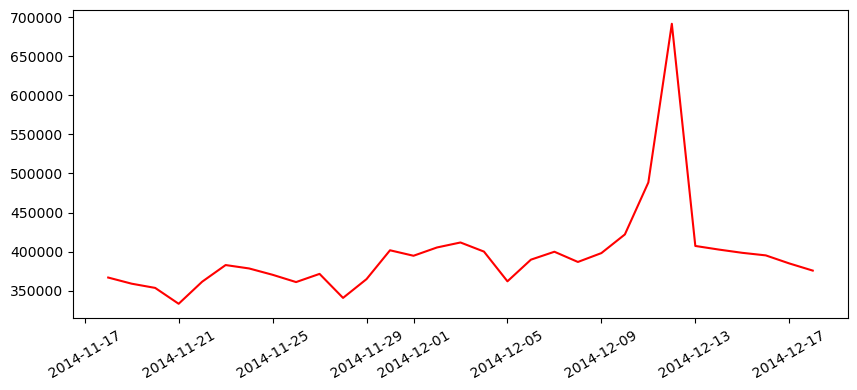

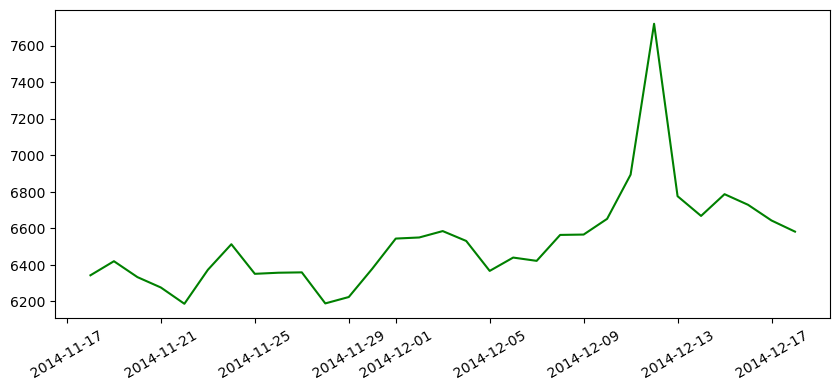

In [66]:
plt.figure(figsize=(10,4))
plt.plot(daliy_pv.index.values, daily_pv.values, 'r')
plt.xticks(rotation=30)
plt.figure(figsize=(10,4))
plt.plot(daliy_uv.index.values, daily_uv.values, 'g')
plt.xticks(rotation=30)
plt.show()

In [51]:
paied_data = pdata[pdata['behavior_type'] == 4]

In [58]:
paied_data_by_user = paied_data.groupby('user_id')['user_id'].count()

<Axes: ylabel='Frequency'>

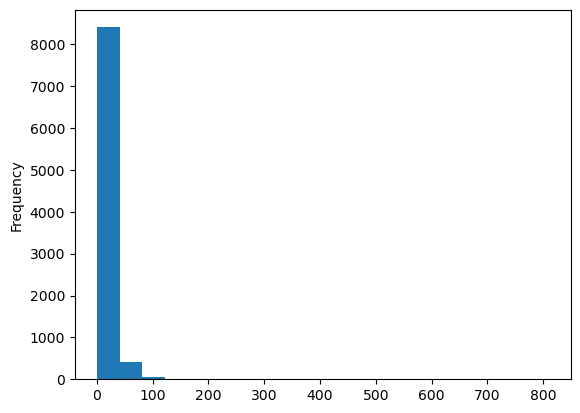

In [76]:
paied_data_by_user.plot.hist(bins=20)

In [92]:
repaied_data_by_user = paied_data.groupby('user_id')['day'].apply(lambda r: len(r.unique()))

In [104]:
repaied_ratio = repaied_data_by_user[repaied_data_by_user>1].count()/repaied_data_by_user.count()

In [107]:
repaied_ratio

0.8717083051991897

In [131]:
day_interval = paied_data.groupby('user_id')['day'].apply(lambda bds: bds.sort_values().diff(1).dropna()).map(lambda x: x.days)

/var/folders/v1/9611nrm96x3brn82q6bxsw0w0000gn/T/ipykernel_15448/2037472885.py:1: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  day_interval = paied_data.groupby('user_id')['day'].apply(lambda bds: bds.sort_values().diff(1).dropna()).map(lambda x: x.days)


In [133]:
day_interval = day_interval[day_interval > 0]

Text(0, 0.5, 'gap_count')

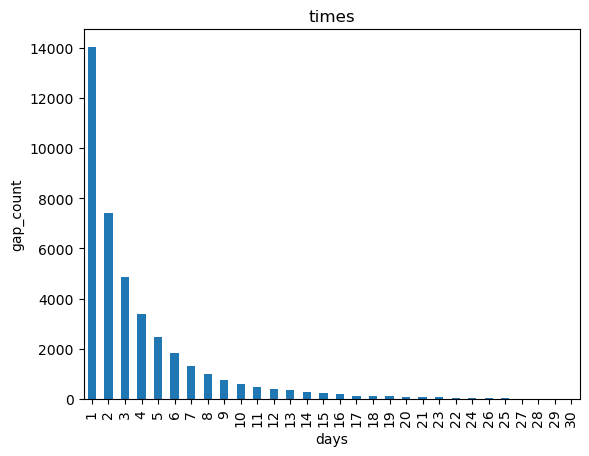

In [135]:
day_interval.value_counts().plot.bar()
plt.title('times')
plt.xlabel('days')
plt.ylabel('gap_count')

In [90]:
paied_data

,user_id,item_id,behavior_type,item_category,time,ts,day,hour
148,101260672,73008997,4,4076,2014-11-25 13,2014-11-25 13:00:00,2014-11-25,13
152,116730636,85319721,4,10079,2014-12-17 11,2014-12-17 11:00:00,2014-12-17,11
158,104811265,61764614,4,675,2014-12-01 13,2014-12-01 13:00:00,2014-12-01,13
185,106230218,238910858,4,12090,2014-12-03 11,2014-12-03 11:00:00,2014-12-03,11
207,100684618,271840783,4,12220,2014-11-23 18,2014-11-23 18:00:00,2014-11-23,18
...,...,...,...,...,...,...,...,...
12256125,60734132,367496336,4,1863,2014-12-15 20,2014-12-15 20:00:00,2014-12-15,20
12256257,62781637,360496886,4,3988,2014-12-17 10,2014-12-17 10:00:00,2014-12-17,10
12256278,62781637,162730101,4,7549,2014-12-11 12,2014-12-11 12:00:00,2014-12-11,12
12256310,62781637,176396353,4,2347,2014-11-28 08,2014-11-28 08:00:00,2014-11-28,8


In [2]:
pdata

NameError: name 'pdata' is not defined

In [4]:
import seaborn as sns

In [26]:
import numpy as np

In [38]:
pdata['num'] = np.ones_like(pdata['hour'])


<Axes: xlabel='day', ylabel='num'>

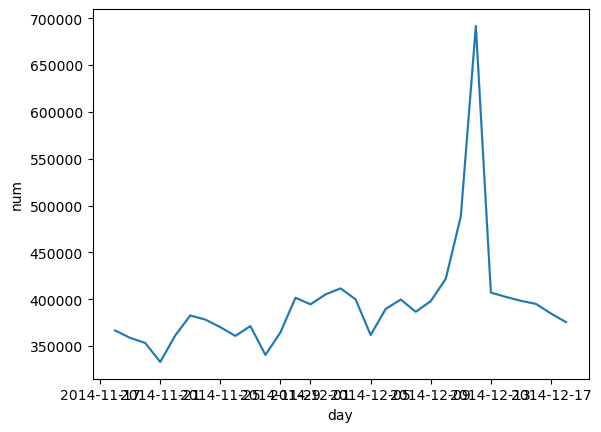

In [40]:
sns.lineplot(pdata,x='day',y='num',estimator='sum')